<a href="https://colab.research.google.com/github/nenaplnk/mai_LR_style_net/blob/main/style_zima_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from PIL import Image

In [5]:
img = Image.open('/content/photo_2025-10-10_15-16-01.jpg').convert('RGB')

In [6]:

img_style = Image.open('/content/Яркий синий фон (40 фото).jpg').convert('RGB')

In [7]:
import torch
import torchvision.transforms.v2 as tfs
import torch.nn as nn
from torchvision import models
import torch.optim as optim

In [8]:
import matplotlib.pyplot as plt


In [9]:
trans = tfs.Compose(
    [
        tfs.ToImage(),
        tfs.ToDtype(torch.float32, scale = True)
    ]
)

In [11]:
img = trans(img).to("cuda:0")
img_style = trans(img_style).to("cuda:0")

In [12]:
img = img.unsqueeze(0)
img_style = img_style.unsqueeze(0)

In [13]:
img_create = img.clone()
img_create.requires_grad_(True)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0',
       requires_grad=True)

In [17]:
img_create = img_create.to('cuda:0')

In [18]:
model = models.vgg19(models.VGG19_Weights.DEFAULT)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [19]:
mf = model.features

In [20]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [21]:
class Style_Net(nn.Module):
  def __init__(self):
    super().__init__()
    _model = models.vgg19(models.VGG19_Weights.DEFAULT)
    self.mf = _model.features
    self.mf.requires_grad_(False)
    self.requires_grad_(False)
    self.mf.eval()
    self.indx_out = (0, 5, 10, 19, 28, 34)
    self.num_style_layers = len(self.indx_out)-1
  def forward(self, x):
    outputs = []
    for indx, layer in enumerate(self.mf):
      x = layer(x)
      if indx in self.indx_out:
        outputs.append(x.squeeze(0))
    return outputs

In [29]:
model = Style_Net().to("cuda:0")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [30]:
model

Style_Net(
  (mf): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [31]:
outputs_img = model(img)
outputs_img_style = model(img_style)

In [32]:
def get_loss_content(last_layer_img, last_layer_img_style):
  return torch.mean(torch.square(last_layer_img-last_layer_img_style))


In [33]:
def gram_matrix(x):
  channels = x.size(0)
  g = x.view(channels, -1)
  gram = torch.mm(g, g.mT)/g.size(1)
  return gram

In [34]:
def get_style_loss(base_style, gram_tsrget):
  style_weigths = [0.00001, 0.000008, 0.000005, 0.000003, 0.00001]
  _loss = 0
  i = 0
  for ba, gr in zip(base_style, gram_tsrget):
    gram_style = gram_matrix(ba)
    _loss += style_weigths[i]*torch.mean(torch.square(gram_style - gr))
    i += 1
  return _loss

In [35]:
gram_matrix_style = [gram_matrix(x) for x in outputs_img_style[:model.num_style_layers]]

In [36]:
content_weight = 1
style_weight = 100
best_loss = -1
epochs = 100
best_img = img_create.clone()


In [37]:
optimizer = optim.Adam(params = [img_create], lr = 0.01)

In [38]:
for _e in range(epochs):
  outputs_img_create = model(img_create)
  loss_content = get_loss_content(outputs_img_create[-1], outputs_img[-1])
  loss_style = get_style_loss(outputs_img_create[:model.num_style_layers], gram_matrix_style)
  loss = content_weight*loss_content + style_weight*loss_style
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if loss < best_loss:
    best_loss = loss
    best_img = img_create.clone()

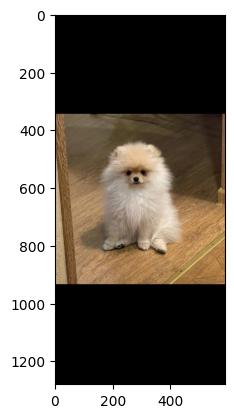

In [39]:
transf_to_img = tfs.Compose([tfs.ToDtype(torch.float32, scale=True),
                                tfs.ToPILImage()])
image = transf_to_img(best_img.squeeze())
image.save('result.jpg')
plt.imshow(image)
plt.show()

In [40]:
kan = Image.open("/content/photo_2025-10-10_15-16-01.jpg")

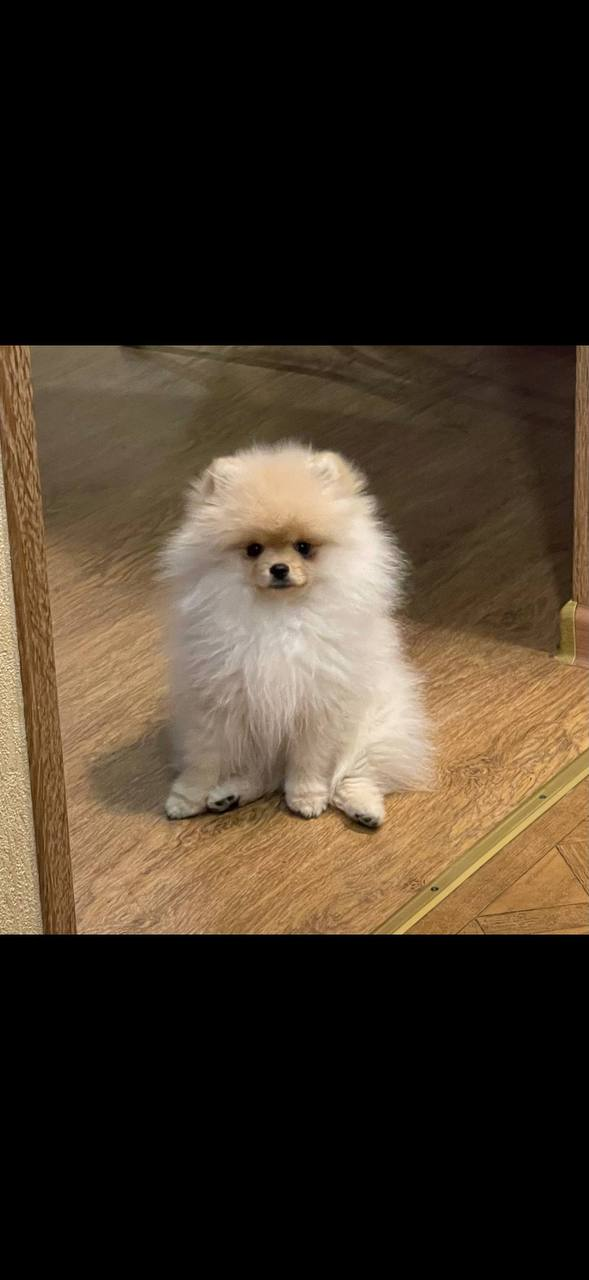

In [41]:
kan